## Loading libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import metrics 
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Import From CSV

In [ ]:
def DataLoading (filename):
    df=pd.read_csv(filename)
    df.columns=[x.upper() for x in df.columns]
    X=df.drop("OUTCOME",axis='columns')
    y=df["OUTCOME"]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)
    return X_train,X_test,y_train,y_test

In [ ]:
def LoadModel(X_train,X_test,y_train,y_test):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    print("###########   DecisionTreeClassifier   ###############  ")
    print("Accuracy DecisionTreeClassifier :", metrics.accuracy_score(y_test, y_pred_dt))
    print("Confusion matrix DecisionTreeClassifier : ",confusion_matrix(y_test, y_pred_dt))  
    print("Classification report DecisionTreeClassifier : ",classification_report(y_test, y_pred_dt)) 
    print("###########   END   ###############  ")
    scaler = StandardScaler()  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=0)  
    mlp.fit(X_train, y_train) 
    mlppredictions= mlp.predict(X_test)  
    print("###########   MLPClassifier   ###############  ")
    print("Accuracy MLPClassifier", metrics.accuracy_score(y_test, mlppredictions))
    print("Confusion matrix MLPClassifier",confusion_matrix(y_test,mlppredictions))  
    print("Classification report MLPClassifier",classification_report(y_test,mlppredictions))  
    print("###########   END   ###############  ")
    svm_clf=SVC(kernel="rbf",gamma=0.1, C=10,probability=True) 
    svm_clf.fit(X_train,y_train)
    predictions_svm = svm_clf.predict(X_test)
    print("###########   SVC   ###############  ")
    print("Accuracy SVC", metrics.accuracy_score(y_test, predictions_svm))
    print("Confusion matrix SVC",confusion_matrix(y_test,predictions_svm))  
    print("Classification report SVC",classification_report(y_test,predictions_svm))  
    print("###########   END   ###############  ")
    y_pred_probadt = dt.predict_proba(X_test)[::,1]
    y_pred_probnn = mlp.predict_proba(X_test)[::,1]
    y_pred_probasvc = svm_clf.predict_proba(X_test)[::,1]
    return y_pred_probadt,y_pred_probnn,y_pred_probasvc

In [ ]:
def PlotROCCurve(y_pred_probadt,y_pred_probnn,y_pred_probasvc):
    #y_pred_probadt = dt.predict_proba(X_test)[::,1]
    fprdt, tprdt, _ = metrics.roc_curve(y_test,  y_pred_probadt)
    aucdt = metrics.roc_auc_score(y_test, y_pred_probadt)
    #y_pred_probnn = mlp.predict_proba(X_test)[::,1]
    fprnn, tprnn, _ = metrics.roc_curve(y_test,  y_pred_probnn)
    aucnn = metrics.roc_auc_score(y_test, y_pred_probnn)
    #y_pred_probasvc = svm_clf.predict_proba(X_test)[::,1]
    fprsvm, tprsvm, _ = metrics.roc_curve(y_test,  y_pred_probasvc)
    aucsvc = metrics.roc_auc_score(y_test, y_pred_probasvc)
    plt.plot(fprdt,tprdt,label="DecisionTreeClassifier, auc="+str(aucdt))
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc=4)
    plt.plot(fprnn,tprnn,label="MLPClassifier ( NN ), auc="+str(aucnn))
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc=4)
    plt.plot(fprsvm,tprsvm,label="SVM, auc="+str(aucsvc))
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc=4)
    plt.show()

## With out PCA

In [ ]:
X_train,X_test,y_train,y_test=DataLoading("../input/diabetes-orginal/diabetes.csv")

In [ ]:
y_pred_probadt,y_pred_probnn,y_pred_probasvc=LoadModel(X_train,X_test,y_train,y_test)

In [ ]:
PlotROCCurve(y_pred_probadt,y_pred_probnn,y_pred_probasvc)

## With PCA

In [ ]:
X_train,X_test,y_train,y_test=DataLoading("../input/diabetes/Diabetes_pca.csv")

In [ ]:
y_pred_probadt,y_pred_probnn,y_pred_probasvc=LoadModel(X_train,X_test,y_train,y_test)

In [ ]:
PlotROCCurve(y_pred_probadt,y_pred_probnn,y_pred_probasvc)

## Before PCA  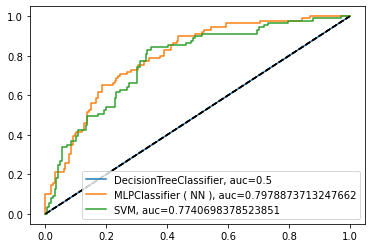  

## After PCA 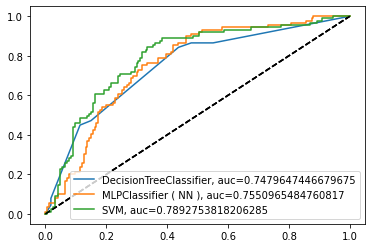